<a href="https://colab.research.google.com/github/miller00315/ia_studies/blob/main/naive_bayes_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.tree import export_graphviz
import graphviz

In [3]:
base = pd.read_csv('insurance.csv')
base

,Unnamed: 0,GoodStudent,Age,SocioEcon,RiskAversion,VehicleYear,ThisCarDam,RuggedAuto,Accident,MakeModel,...,HomeBase,AntiTheft,PropCost,OtherCarCost,OtherCar,MedCost,Cushioning,Airbag,ILiCost,DrivHist
0,1,False,Adult,Prole,Adventurous,Older,Moderate,EggShell,Mild,Economy,...,City,False,TenThou,Thousand,True,Thousand,Poor,False,Thousand,Many
1,2,False,Senior,Prole,Cautious,Current,None,Football,None,Economy,...,City,True,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero
2,3,False,Senior,UpperMiddle,Psychopath,Current,None,Football,None,FamilySedan,...,City,False,Thousand,Thousand,False,Thousand,Good,True,Thousand,One
3,4,False,Adolescent,Middle,Normal,Older,None,EggShell,None,Economy,...,Suburb,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Zero
4,5,False,Adolescent,Prole,Normal,Older,Moderate,Football,Moderate,Economy,...,City,False,TenThou,Thousand,False,Thousand,Fair,False,Thousand,Many
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,False,Adult,Prole,Adventurous,Older,Mild,Football,Mild,Economy,...,City,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Many
19996,19997,False,Adult,Middle,Normal,Older,None,Tank,None,FamilySedan,...,Suburb,False,Thousand,Thousand,True,Thousand,Good,False,Thousand,Zero
19997,19998,False,Senior,UpperMiddle,Normal,Current,None,Football,None,Luxury,...,Secure,True,TenThou,Thousand,False,Thousand,Excellent,True,Thousand,Zero
19998,19999,False,Adult,Middle,Normal,Older,None,Football,None,FamilySedan,...,Suburb,False,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero


In [6]:
'''
Remover a coluna desnecessária
'''

base = base.drop(columns = ['Unnamed: 0'])

base

,GoodStudent,Age,SocioEcon,RiskAversion,VehicleYear,ThisCarDam,RuggedAuto,Accident,MakeModel,DrivQuality,...,HomeBase,AntiTheft,PropCost,OtherCarCost,OtherCar,MedCost,Cushioning,Airbag,ILiCost,DrivHist
0,False,Adult,Prole,Adventurous,Older,Moderate,EggShell,Mild,Economy,Poor,...,City,False,TenThou,Thousand,True,Thousand,Poor,False,Thousand,Many
1,False,Senior,Prole,Cautious,Current,None,Football,None,Economy,Normal,...,City,True,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero
2,False,Senior,UpperMiddle,Psychopath,Current,None,Football,None,FamilySedan,Excellent,...,City,False,Thousand,Thousand,False,Thousand,Good,True,Thousand,One
3,False,Adolescent,Middle,Normal,Older,None,EggShell,None,Economy,Normal,...,Suburb,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Zero
4,False,Adolescent,Prole,Normal,Older,Moderate,Football,Moderate,Economy,Poor,...,City,False,TenThou,Thousand,False,Thousand,Fair,False,Thousand,Many
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,False,Adult,Prole,Adventurous,Older,Mild,Football,Mild,Economy,Poor,...,City,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Many
19996,False,Adult,Middle,Normal,Older,None,Tank,None,FamilySedan,Normal,...,Suburb,False,Thousand,Thousand,True,Thousand,Good,False,Thousand,Zero
19997,False,Senior,UpperMiddle,Normal,Current,None,Football,None,Luxury,Excellent,...,Secure,True,TenThou,Thousand,False,Thousand,Excellent,True,Thousand,Zero
19998,False,Adult,Middle,Normal,Older,None,Football,None,FamilySedan,Excellent,...,Suburb,False,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero


In [7]:
y = base.iloc[:, 7] #variáveis dependentes, todos os items menos a coluna 7

columns = list(range(0, 27))

columns.remove(7)

X = base.iloc[:, columns].values # variáveis explanatórias

X.shape

(20000, 26)

In [11]:
labelEncoder = LabelEncoder()

for i in range(X.shape[1]):
  if X[:, i].dtype == 'object':
    X[:, i] = labelEncoder.fit_transform(X[:, i])

In [12]:
X

array([[0, 1, 1, ..., 0, 3, 0],
       [0, 2, 1, ..., 1, 3, 2],
       [0, 2, 2, ..., 1, 3, 1],
       ...,
       [0, 2, 2, ..., 1, 3, 2],
       [0, 1, 0, ..., 1, 3, 2],
       [0, 1, 0, ..., 1, 3, 2]], dtype=object)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

In [33]:
model = DecisionTreeClassifier(random_state=1)

#model = DecisionTreeClassifier(random_state=1, max_depth=8)

#model = DecisionTreeClassifier(random_state=1, max_depth=8, max_leaf_nodes=8)



model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

**Podando a árvore**

In [34]:
path = model.cost_complexity_pruning_path(X_train, y_train)

ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

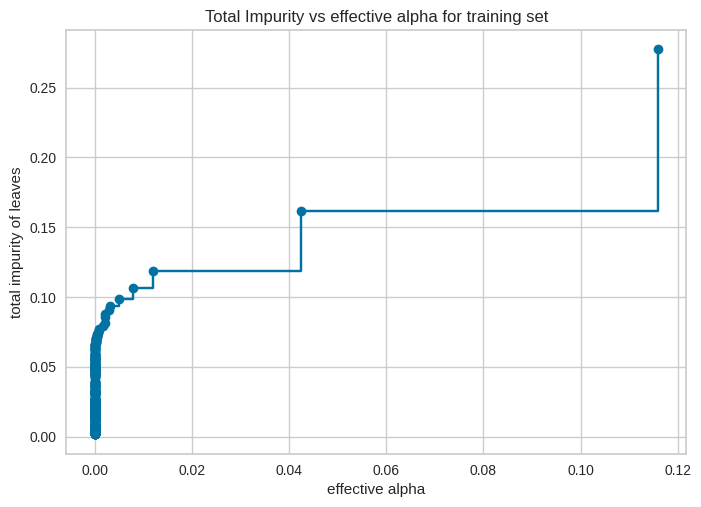

In [36]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

**Salvando o modelo em um arquivo abaixo**

In [16]:
import pickle

# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

**Fazendo previsões e medindo a acurácia**

In [29]:
predictions = model.predict(X_test)

In [18]:
predictions

array(['None', 'None', 'None', ..., 'None', 'Mild', 'None'], dtype=object)

In [30]:
accuracy = accuracy_score(y_test, predictions)

precision = precision_score(y_test, predictions, average='weighted') # Com peso

recall = recall_score(y_test, predictions, average='weighted')

f1 = f1_score(y_test, predictions, average='weighted')

print(f'Acurácia: {accuracy}, precisão: {precision}, recall: {recall}, F1: {f1}')

Acurácia: 0.9398333333333333, precisão: 0.9389925807903848, recall: 0.9398333333333333, F1: 0.9377075487307824


In [23]:
report = classification_report(y_test, predictions)


print(report)

              precision    recall  f1-score   support

        Mild       0.73      0.75      0.74       542
    Moderate       0.69      0.70      0.70       505
        None       0.98      0.98      0.98      4228
      Severe       0.88      0.84      0.86       725

    accuracy                           0.92      6000
   macro avg       0.82      0.82      0.82      6000
weighted avg       0.92      0.92      0.92      6000



**Gerando o grafo da árvore de decisão**

In [31]:
dot_data = export_graphviz(model, out_file=None, filled=True, feature_names=base.columns[:-1], class_names=True, rounded=True)

graph = graphviz.Source(dot_data)

graph.render("decision_tree", format="png")

'decision_tree.png'